# Skillbox — Мастер-класс: Разведочный анализ данных + Подготовка отчётов — Kiva.org
***

# Новый раздел

# 4. Домашнее задание
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import os

In [2]:
df_kiva_loans = pd.read_csv("../kiva/kiva_loans.csv")
df_mpi = pd.read_csv("../kiva/kiva_mpi_region_locations.csv")
df_kiva_loans.head(5)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


## 4.1. Самостоятельная работа
***

- А в каких странах преобладают мужчины? Группа людей? (п. 2.2.2.)
- Изучите несколько займов с очень большими суммами. Что можно сказать о назначении этих заявок? В каких странах они оформлены? Каков гендерный состав заявителей? (п. 2.4.2.)
- Попробуйте найти связь между странами (регионами), полом заёмщика и суммой заявки. Какие выводы можно сделать из этих данных? (п. 2.4.3.)

In [3]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [4]:
df_kiva_loans['borrower_genders'].value_counts()
df_kiva_loans['borrower_genders'] = \
[elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders']]

In [5]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    #.sort_values(by=['male', 'female'], ascending=False)[-20:]

df_gender_by_country = df_gender_by_country[['male', 'group', 'female']]

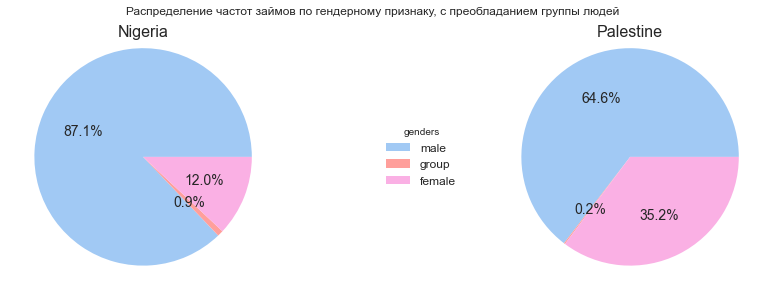

In [6]:
man_domin = df_gender_by_country[df_gender_by_country['male'] > (df_gender_by_country['female'] + df_gender_by_country['group'])]
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16,5))
colors = sns.color_palette('pastel')[:7:3]

for i in range(len(man_domin.index)):
    ax = axs[i]
    ax.pie(x=man_domin.values[i], labels=None, autopct='%.1f%%', colors=colors,\
          textprops=dict(fontsize=14), radius=1)
    ax.set_title(man_domin.index[i], fontsize=16, y=0.92)
    
    if i == 1:
        ax.legend(
        title='genders',
        labels=man_domin.columns,
        loc='center right',
        bbox_to_anchor=(1, 0, -1.1, 1),
        fontsize=12)
        
fig.suptitle('Распределение частот займов по гендерному признаку, с преобладанием группы людей', y=0.92)

plt.show()

Из диаграмм очевидно, что только в **Нигерии** и **Палестине** среди заемщиков преобладают мужчины.

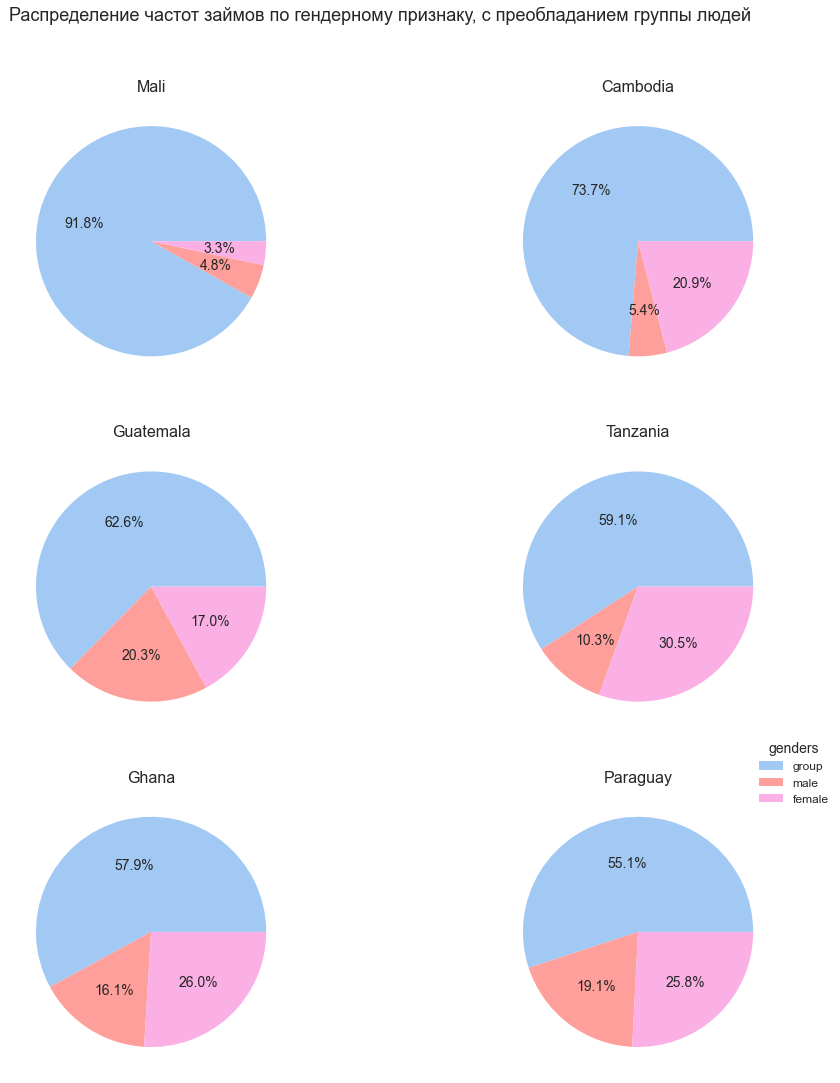

In [7]:
df_gender_by_country = df_gender_by_country[['group', 'male', 'female']]
group_domin = df_gender_by_country[df_gender_by_country['group'] > (df_gender_by_country['female'] + df_gender_by_country['male'])]\
    .sort_values(by='group', ascending=False)

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,18))

colors = sns.color_palette('pastel')[:7:3]

country_it = iter(list(group_domin.index))

for ax in axs:
    for i_ax in ax:
        country = next(country_it)
        
        group_domin.loc[country]\
        .plot.pie(
            labels=None,
            autopct='%.1f%%',
            ax=i_ax,
            textprops=dict(fontsize=14),
            colors=colors)
        
        i_ax.set_title(country, fontsize=16)
        i_ax.set_ylabel('', visible=False)


        
plt.legend(labels=list(group_domin.columns),
           title='genders',
           loc='best',
           bbox_to_anchor=[0.7, 0.6, 0.5, 0.6],
           title_fontsize=14,
           fontsize=12
           )

fig.suptitle('Распределение частот займов по гендерному признаку, с преобладанием группы людей', y=0.95, fontsize=18)
plt.show()


Изучение списка стран, в которых большинством заемщиков являются группы из мужчин и женщин, показало, что наиболее часто группы людей выступают в роли заемщиков в **Мали, Камбодже, Гватемале, Танзании, Гане и Парагвае**.

In [8]:
 df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')


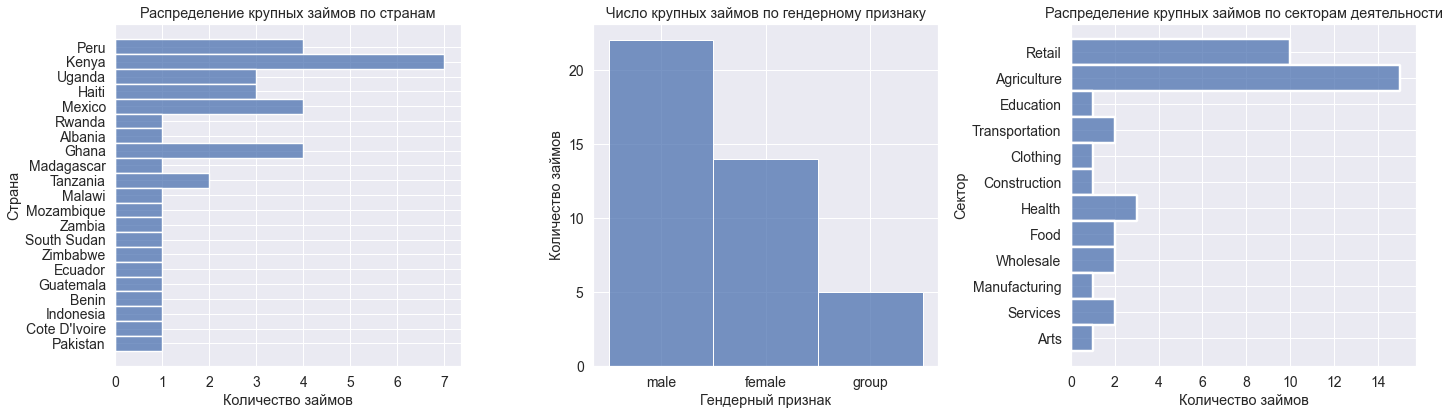

In [9]:
sns.set(font_scale=1.2)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,6))
for i in range(len(axs)):
    axs[i].tick_params(labelsize=14)

big_loan = df_kiva_loans[df_kiva_loans['loan_amount'] >= 50000][['country', 'loan_amount', 'sector', 'borrower_genders', 'use']]#.head(10)


sns.histplot(data=big_loan, y='country', ax=axs[0])\
    .set(title='Распределение крупных займов по странам', ylabel='Страна', xlabel='Количество займов')
axs[0].tick_params('x')

sns.histplot(data=big_loan, x='borrower_genders', ax=axs[1])\
    .set(title='Число крупных займов по гендерному признаку', ylabel='Количество займов', xlabel='Гендерный признак')

sns.histplot(data=big_loan, y='sector', ax=axs[2])\
    .set(title='Распределение крупных займов по секторам деятельности', ylabel='Сектор', xlabel='Количество займов')

fig.tight_layout()
plt.show()

In [10]:
for i_use in big_loan['use'][:10]:
    print(i_use)

to buy and sell Barefoot Power's Solar Lighting Products
To buy and sell Barefoot Power's solar lighting products
To buy and sell Barefoot Power solar lighting.
create more than 300 jobs for women and farmers in rural Haiti.
to buy and plant resin producing pine trees. The resin will be harvested annually, providing income for many years
to fund its growing loan book and further develop its unique farmer management system
To work with 17 farming cooperatives to process long-grain rice during the January harvest
to provide loans and career services for the lowest-income students in Mexico.
nan
to generate USD1.2mm in fuel savings and impact the lives of 150 taxi drivers


Как можно видеть из полученных результатов выше, наиболее часто столь крупные займы (не менее 50k) берут жители **Кении*** (7 займов). Заемщиками же в таких займах чаще выступают **мужчины**. А наиболее частыми сферами деятельности, для которых одалживаются средства, являются **сельское хозяйство** и **розничная торговля**.
Среди конкретных нужд нельзя выделить какую-либо зависимость.

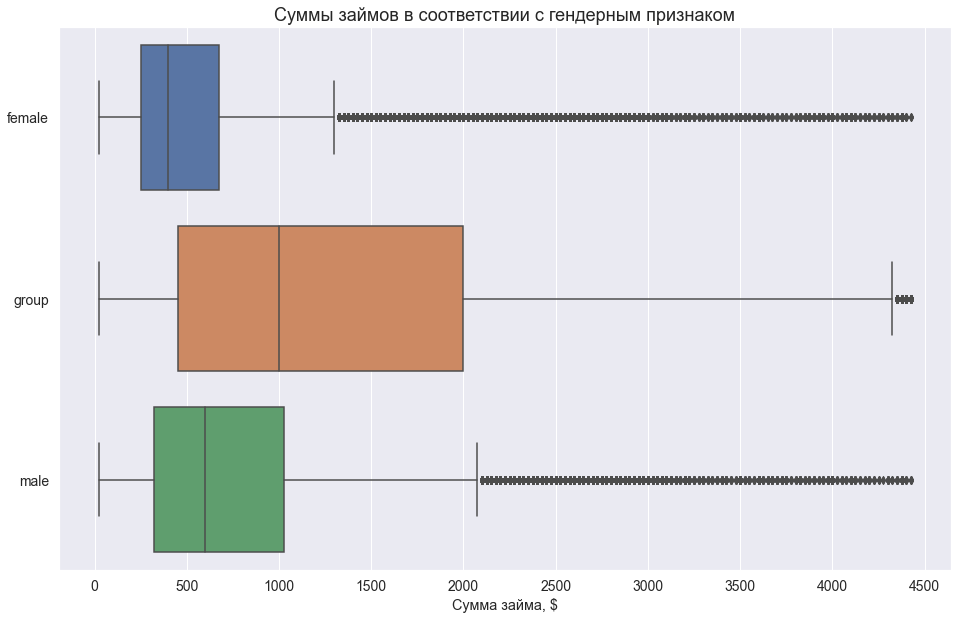

In [94]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(16,10))
plt.title("Суммы займов в соответствии с гендерным признаком", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y='borrower_genders', data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)

plt.xlabel('Сумма займа, $')
plt.show()


Судя по промежутку от медианы до верхней границы боксплота для группы людей, можно сделать вывод о том, что *группы людей чувствуют себя более защищенными, поскольку чувствуют поддержку со стороны единомышленников, а потому более часто берут большие кредиты*. Сравнивая единоличные боксплоты мужчин и женщин, можно лишь сказать, что *женщины склонны чаще рисковать*, судя по количеству выбросов на графике, при этом *медианное значение суммы займа у мужчин примерно на 200$ выше*.

In [13]:
wregions = df_kiva_loans_trimmed['world_region'].value_counts()
order = wregions.index.to_list()

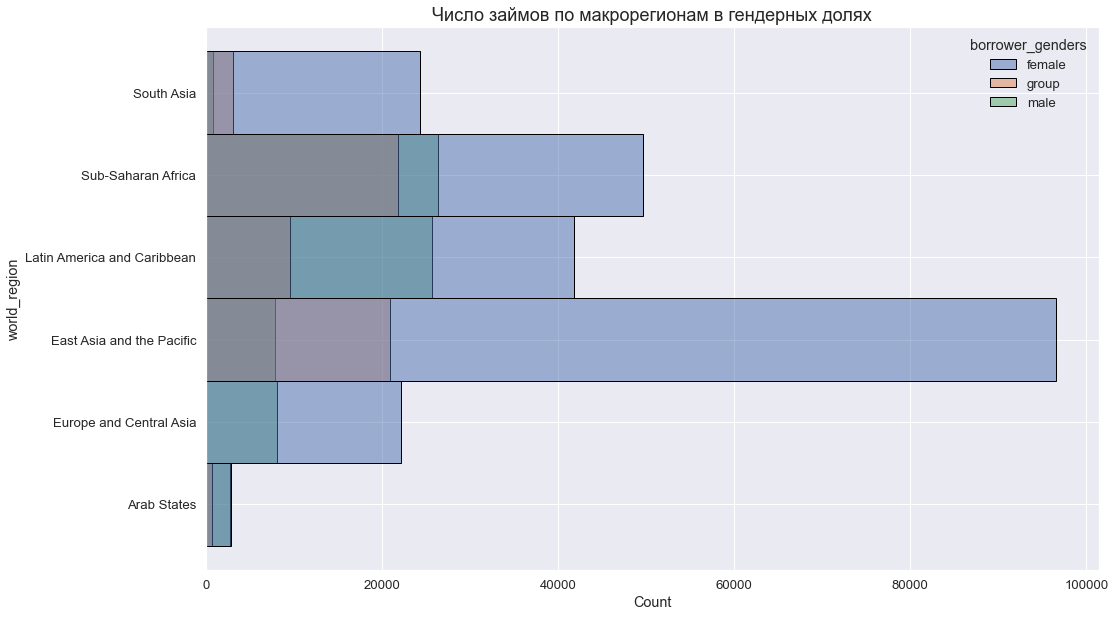

In [14]:
fig, ax = plt.subplots(figsize=(16,10))

sns.histplot(data=df_kiva_loans_trimmed.dropna(),
             y='world_region',
             hue='borrower_genders',
             ax=ax,
             linewidth=1,
             edgecolor='black')
ax.set_title('Число займов по макрорегионам в гендерных долях', fontsize=18)

plt.show()

**Основным заемщиком** во всех макрорегионах выступают **женщины**. Исключением являются Арабские Эмираты, что можно связать с отношением к правам женщин в исламском мире. Наибольшее количество займов, медианное значение которых самое низкое (см. 2.4.3), в целом приходится на **Восточную Азию и страны Тихоокеанского побережья**. По всей видимости, это обусловлено густотой населения макрорегиона (Китай).

Полной противоположностью этому макрорегиону служат уже упомянутые **Арабские Эмираты**. Там наблюдается минимальное количество займов, осуществлямых, в основном мужчинами, и при этом верхняя граница *сумм займов*, не являющихся выбросами, - *одна из самых высоких (примерно 1450$)*.

## 4.2. Домашняя работа
***

Расширьте наш отчёт исследованием следующих вопросов:

- Зависимость пола заёмщика от региона планеты, сектора экономики.
- Влияние такого атрибута займа, как **Количество кредиторов** (lender_count), на суммы и сроки займов.
- Влияние показателя **MPI** (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.
- Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе **макрорегионов**.

### 1. Зависимости пола заемщика от региона планеты и сектора экономики

Возьмем график из раздела "Самостоятельная работа" и проанализируем его на зависимость пола от макрорегиона планеты.

In [36]:
wregions = df_kiva_loans_trimmed['world_region'].value_counts()
wregions = wregions.index.to_list()

In [43]:
df_gender_by_wregion = \
    df_kiva_loans[df_kiva_loans['world_region'].isin(wregions)]\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by='female')

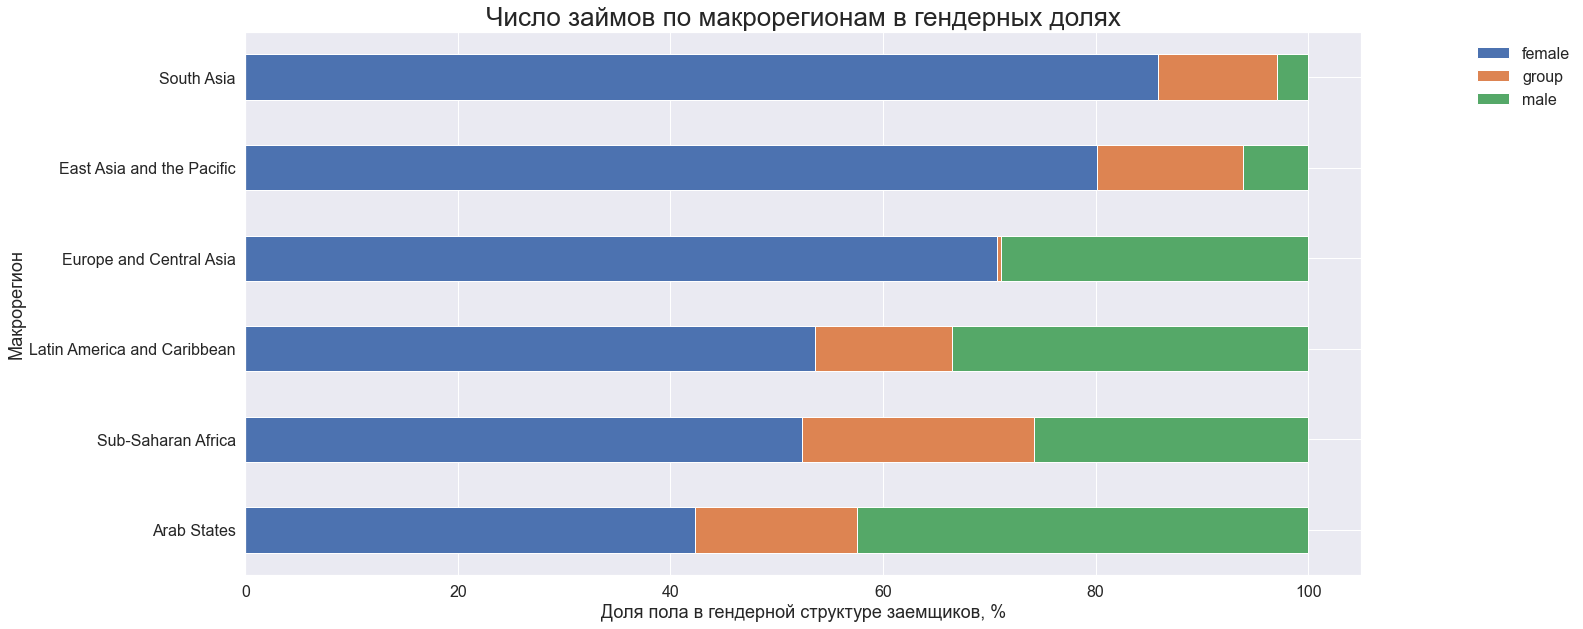

In [75]:
plot = df_gender_by_wregion.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Число займов по макрорегионам в гендерных долях')
plot.title.set_size(26)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plt.ylabel('Макрорегион', fontsize=18) 
plt.xlabel('Доля пола в гендерной структуре заемщиков, %', fontsize=18)
plt.show()

Как видно из диаграммы, и как уже было отмечено ранее, **во всех регионах**, **кроме ОАЭ**, в качестве заемщиков выступают, по большей части, **женщины**. Влияние ценностных устоев общества также можно оценить и по гендерной палитре **Европы**. По крайней мере, в европейских странах, традиционно, человек считает себя личностью в отрыве от коллетивной деятельности. По-видимому, вследствие этого, **групповые займы** в этих странах почти что **отсутствуют**.

Большое количество займщиков в лице женщин также можно связать с отсутствием предложений со стороны работодателей, ввиду чего женщины вынуждены организовывать свое дело с целью личного заработка.

In [46]:
sectors = df_kiva_loans['sector'].unique()

In [47]:
df_gender_by_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors)]\
    .groupby(['sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by='female')

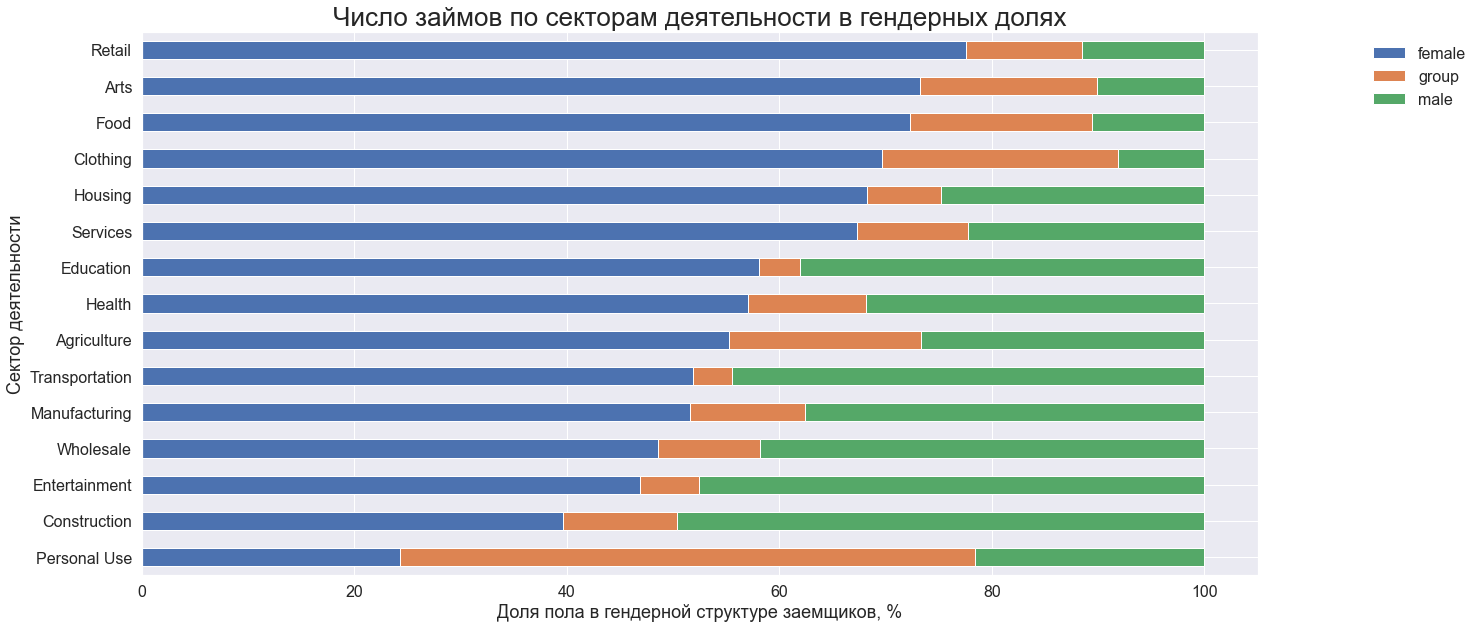

In [48]:
plot = df_gender_by_sector.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Число займов по секторам деятельности в гендерных долях')
plot.title.set_size(26)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plt.ylabel('Сектор деятельности', fontsize=18) 
plt.xlabel('Доля пола в гендерной структуре заемщиков, %', fontsize=18)
plt.show()

In [780]:
group_use = df_kiva_loans_trimmed[(df_kiva_loans_trimmed['borrower_genders'] == 'group') 
                                  & (df_kiva_loans_trimmed['sector'] == 'Personal Use')]['use'].head(20)
for i in list(group_use.values):
    print(i)

nan
to buy home appliances and a television for her house.
to buy a washing machine in order to easily wash her husband's and her children's clothes
to  buy home appliances.
to buy home appliances for her house.
nan
 to buy household supplies for her family to use
to buy household supplies and a motorbike
nan
to build a proper latrine for her family
to build one decent latrine for her home.
to build a family latrine.
nan
To build a decent latrine for her household
to buy a decent motorbike for commuting back and forth to the workplace.
To build a decent latrine for his household
To build a latrine for her family.
construct a bio-digester.
to be able to buy a cupboard for her home.
to buy furniture and home appliances to improve the living conditions in her house. 


Основным заемщиком, в выделяющихся сферах деятельности - **сельском хозяйстве, розничной торговле** по-прежнему выступают женщины, хотя в области **сельского хозяйства**, мужчины составляют примерно треть заемщиков относительно женщин, с отрывом ~1000 займов от групп.

Среди первых потребностей лидирет **пища**, для покупки которой было осуществлено **более 50 тыс. займов**, из которых около **80%** принадлежат **женщинам**. 

**Самыми редкими** займами являются займы на **оптовую продажу** и **развлечения**, что очевидно, ведь и то и другое требует крупных финансовых затрат и удовлетворенности в базовых потребностях.

**Преобладание групп** людей в секторе **личных нужд**, заставило тщательно исследовать данный сегмент датасета. Однако его анализ показал, что в целом, нужды, описанные как личные, *можно отнести к таким категориям как "обустройство дома", "еда", "образование"* и т.п. *Возможно, сотрудникам Kiva следует тщательней проверять заполненные заемщиками анкеты*.

### 2. Влияние количества кредиторов на суммы и сроки займов

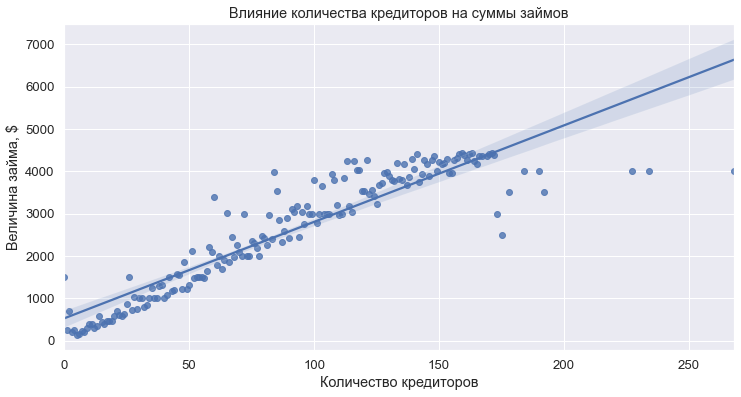

In [51]:
df2 = df_kiva_loans_trimmed[['lender_count', 'loan_amount', 'term_in_months']].drop_duplicates(subset='lender_count')
fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(data=df2, x='lender_count', y='loan_amount')
ax.set_title('Влияние количества кредиторов на суммы займов')
ax.set_xlabel('Количество кредиторов')
ax.set_ylabel('Величина займа, $')

plt.show()

В целом, из графика выше, очевидна **линейно возрастающая зависимость суммы займа от количества кредиторов**.

Чего нельзя сказать о сроке, на который эти кредиты берутся.

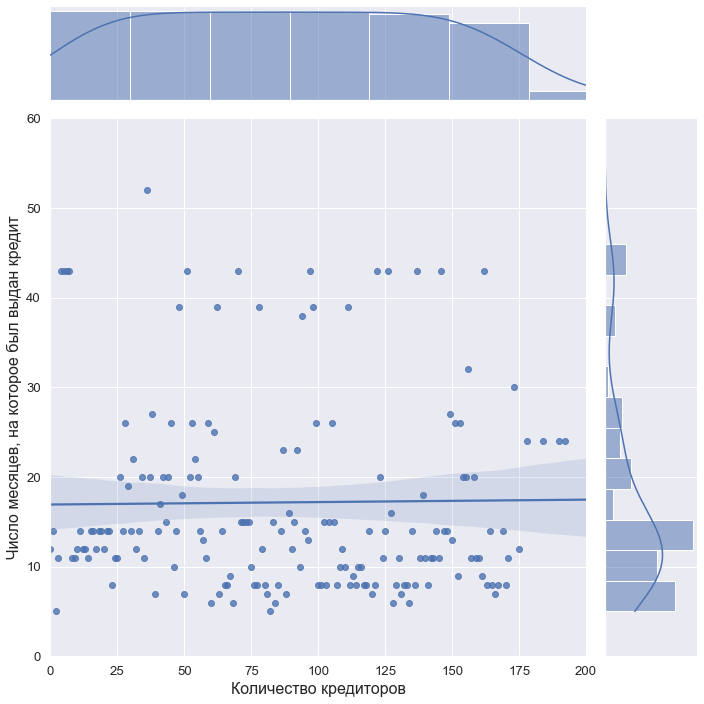

In [72]:
j = sns.jointplot(data=df2, x='lender_count', y='term_in_months', ax=ax, kind='reg', xlim=[0,200], ylim=[0,60], height=10, ratio=5)

j.set_axis_labels(xlabel='Количество кредиторов', ylabel='Число месяцев, на которое был выдан кредит', fontsize=16)

plt.show()

Здесь разброс данных довольно хаотичный и нельзя с уверенностью сказать о наличии какой-либо зависимости. Известно только, что **вне зависимости от количества кредиторов**, большинство займов нуждающиеся берут на промежуток **от 7 до 15 месяцев**.

### 3. Влияние MPI в разных странах на суммы займов и сроки погашения

Для анализа влияния MPI в разных странах на суммы займов и сроки погашения, рассмотрим каждую пятую страну, в отсортированном по убыванию MPI списке стран.

In [82]:
bins = [0, 3, 7, 12, 23, 100, 268]

df_kiva_loans_trimmed['binned'] = pd.cut(df_kiva_loans_trimmed['lender_count'], bins=bins)

<ipython-input-82-8c3e7455827b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kiva_loans_trimmed['binned'] = pd.cut(df_kiva_loans_trimmed['lender_count'], bins=bins)


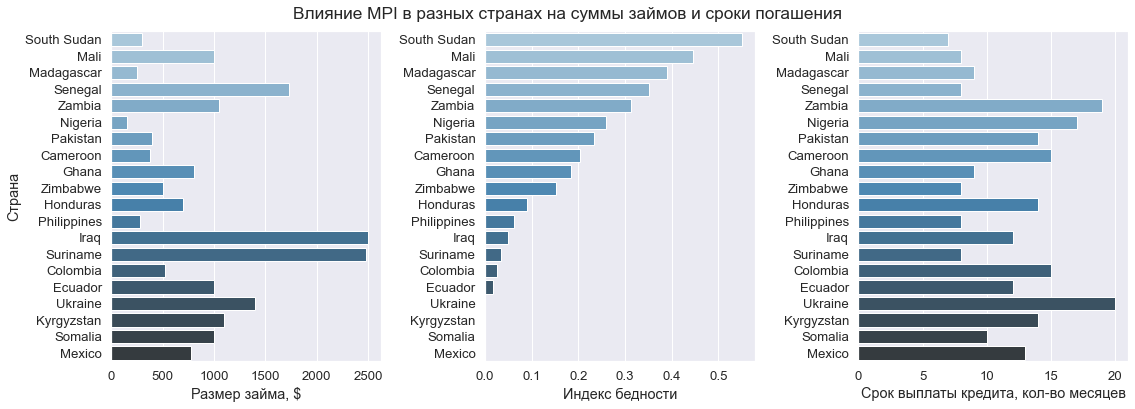

In [88]:
df3 = df_kiva_loans_trimmed[['country', 'MPI', 'loan_amount', 'term_in_months']]\
    .dropna()\
    .groupby(['country', 'MPI'])\
    .agg({'loan_amount': 'median', 'term_in_months': 'median'})\
    .reset_index()\
    .sort_values(by='MPI', ascending=False)

la_order = list(df3[['country', 'MPI']][::3].sort_values(by='MPI', ascending=False)['country'].values)
xlabels = ['Размер займа, $', 'Индекс бедности', 'Срок выплаты кредита, кол-во месяцев']

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16,6))
for i, value in enumerate(['loan_amount', 'MPI', 'term_in_months']):
    sns.barplot(data=df3[::3],
                x=value,
                y='country',
                order=la_order,
                ax=axs[i],
                palette='Blues_d')
    if i == 0:
        axs[i].set_ylabel('Страна')
    else:
        axs[i].set_ylabel(None)
    axs[i].set_xlabel(xlabels[i])
    
ax.set_title('Влияние MPI на суммы займов')

fig.suptitle('Влияние MPI в разных странах на суммы займов и сроки погашения', y=0.95)
plt.tight_layout()
plt.show()

Полученные графики показывают явную зависимость размера займа от коэффициента бедности в стране. Например, в таких странах как **Ирак, Суринам**, где коэффициенты бедности близки к нулевым значениям, **медианные** величины **суммы займов** являются одними из **самых высоких**.

Наоборот, в странах с **высоким MPI**, например в **Южном Судане**, медианные суммы займов очень низкие наряду с небольшими сроками кредитования.

Судить о времени выплаты кредита можно лишь в разрезе стран с самым высоким MPI и с самым низким. При таком сравнении существует явная зависимость, как видно из MPI и времени выплаты **Южного Судана - Мали**, **Украины - Киргизии**: чем больше MPI, тем за более короткий срок кредиты выплачиваются, пусть и в виде небольших сумм.

<ipython-input-95-a62b19c9c4ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kiva_loans_trimmed['binned'] = pd.cut(df_kiva_loans_trimmed['lender_count'], bins=bins)


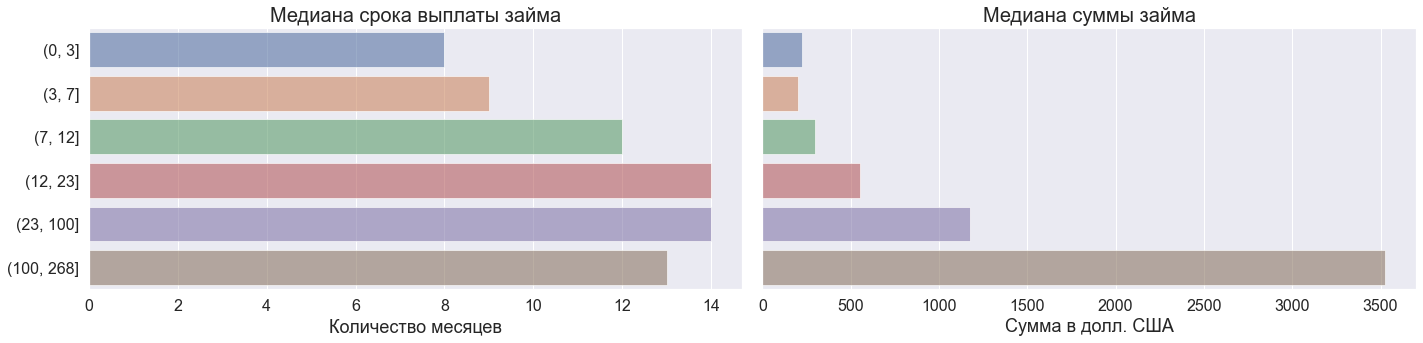

In [95]:
bins = [0, 3, 7, 12, 23, 100, 268]

df_kiva_loans_trimmed['binned'] = pd.cut(df_kiva_loans_trimmed['lender_count'], bins=bins)

df_binned_median = df_kiva_loans_trimmed.groupby(['binned'])\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_binned_median = df_binned_median.sort_values(by='binned')

f,ax=plt.subplots(1, 2, sharey=True, figsize=(20,5))

sns.barplot(y='binned', x='term_in_months', data=df_binned_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)
sns.barplot(y='binned', x='loan_amount', data=df_binned_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

### 4. Зависимости некоторых метрик в разрезе макрорегионов

Опишем в данном разделе зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж» на основе медианных значений.

In [89]:
from datetime import datetime, timedelta
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns:
dates = ['posted_time','disbursed_time']

# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

/Users/kron/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/kron/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/kron/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [90]:
f = lambda x: round(x['loan_amount'] / x['term_in_months'], 1)

<ipython-input-92-1d9d6e41fc8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['monthly_payment'] = df4.apply(f, axis=1)


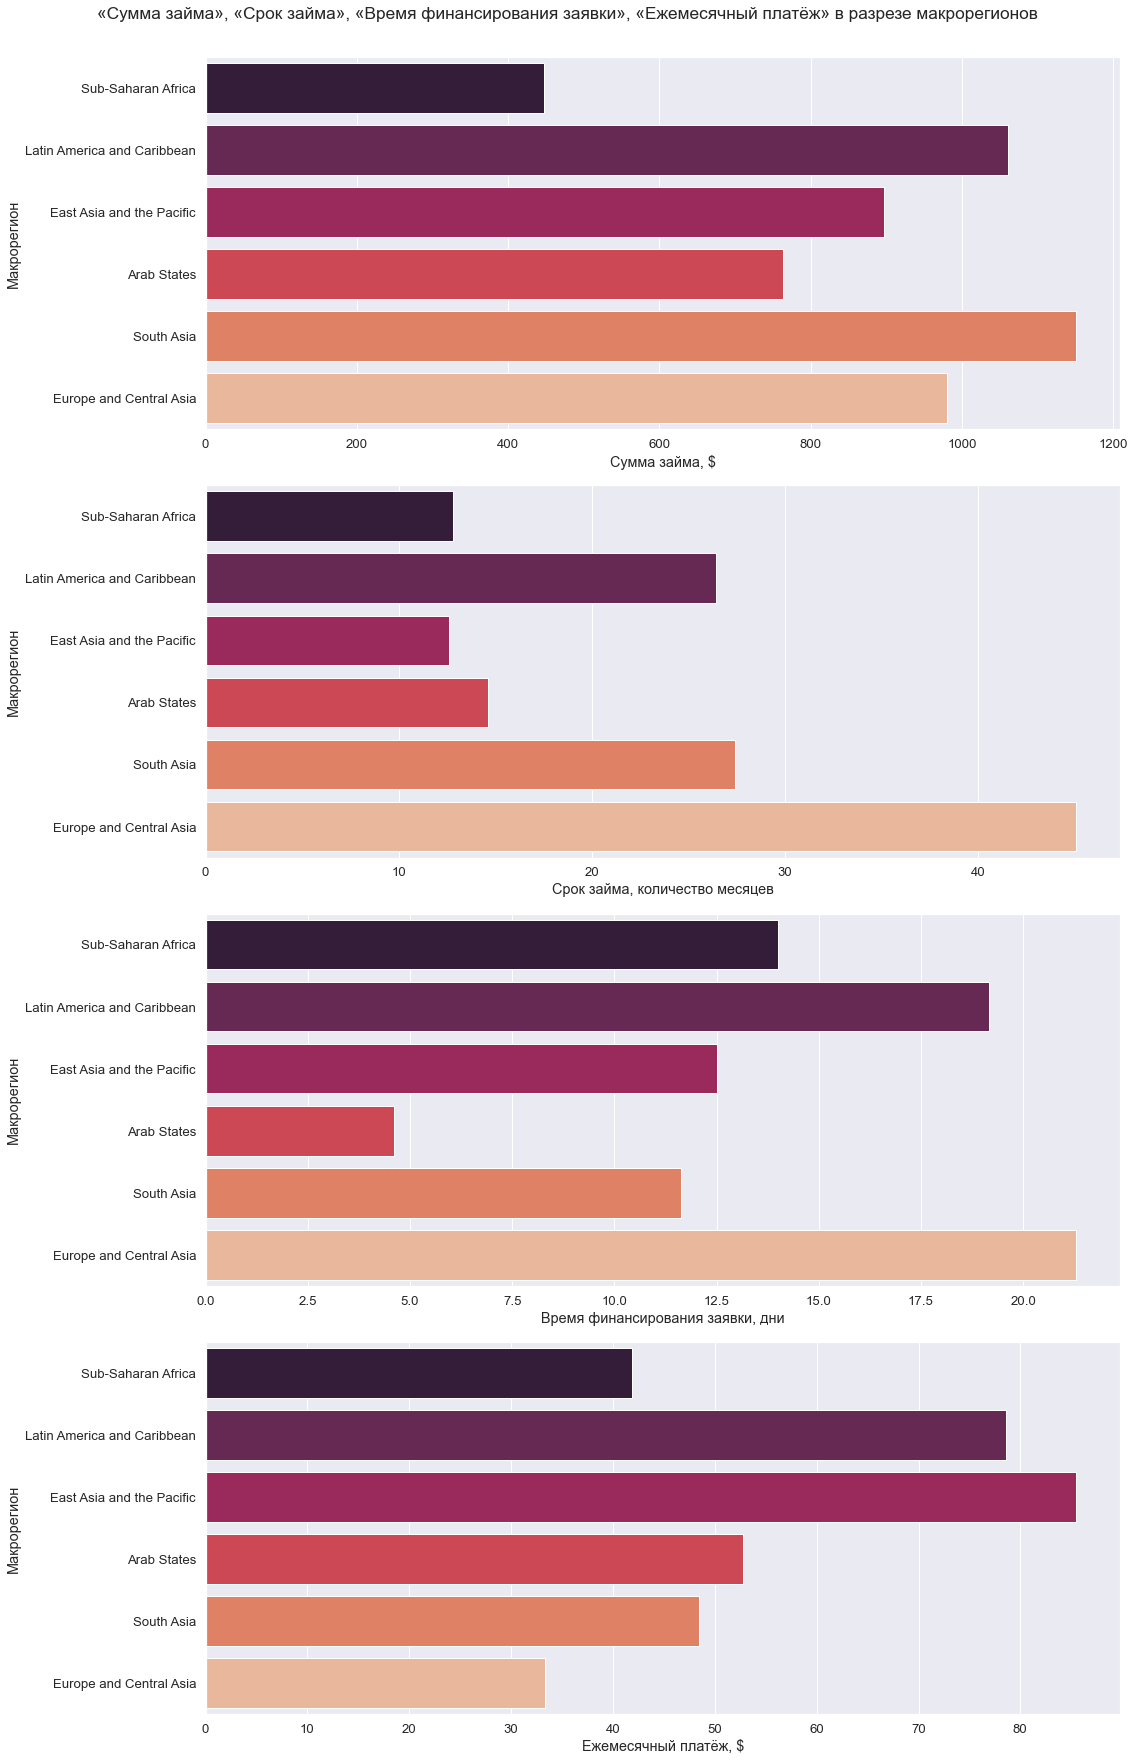

In [92]:
df4 = df_loans_dates_trimmed[['world_region', 'loan_amount', 'term_in_months', 'time_funding']]
df4['monthly_payment'] = df4.apply(f, axis=1)
df4.dropna().groupby('world_region')\
    .agg({'loan_amount': 'median', 'term_in_months': 'median', 'time_funding': 'median', 'monthly_payment': 'median'})\
    .reset_index()

xlabels = ['Сумма займа, $', 'Срок займа, количество месяцев', 'Время финансирования заявки, дни', 'Ежемесячный платёж, $']

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(16,24), sharey=True)
for i, value in enumerate(['loan_amount', 'term_in_months', 'time_funding', 'monthly_payment']):
    sns.barplot(data=df4,
                x=value,
                y='world_region',
                ax=axs[i],
                palette='rocket',
                ci=None)
    axs[i].set_ylabel('Макрорегион')
    axs[i].set_xlabel(xlabels[i])

plt.tight_layout()
fig.suptitle('«Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж» в разрезе макрорегионов', y=1.02)
plt.show()

**Африка**
Этот макрорегион отличается самой низкой величиной займа, по-видимому из-за потребностей населения. Помесячные выплаты не превышают 50 долларов, при одном из самых коротких сроков выплаты кредита. Сбор средств при этом чаще составляет более 13 дней.

**Латинская Америка**
Отличается высокими медианными показателями всех метрик, за исключением сроков выплаты по кредиту.

**Восточная Азия**
Регион является лидером в ежемесяных выплатах по кредиту, медианное значение которых - более 80 при среднем значении срока выплат(не более 30 месяцев) и достаточно высоких показателях суммы займа (чуть меньше 900 долларов). По всей видимости данный факт можно связать с высокими темпами развития некоторых стран макрорегиона (Китай).

**Арабские Эмираты**
Здесь Kiva стоит обратить внимание на сроки финансирования займов. Возможно в данном макрорегионе необходимо провести более широкую рекламную компанию с целью привлечения средств для реализации потребностей заемщиков. Видимо опубликованные заявки на кредит сильно привлекают кредиторов.

**Южная Азия**
Лидирующий макрорегион по сумме займа, при довольно средней величине месячного платежа, равно как и остальных метрках.

**Европа и Центральная Азия**
Страны этого макрорегина сильно отстают от остальных в разрезе временнЫх метрик. Kiva стоит обратить внимание на это и попытаться популяризировать заявки жителей этих стран с целью более быстрого удовлетворения потребностей пользователей.